In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os

In [2]:
save_plot = True

currentNotebook = 'plot_deflection_method_shower_dist'

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
file_path = 'data/deflection_method_shower_dist/ginneken.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()
keys

['E1000_highland_v_cut0_001_e_cutinf',
 'E1000_highland_v_cut0_05_e_cut500',
 'E1000_highlandintegral_v_cut0_001_e_cutinf',
 'E1000_highlandintegral_v_cut0_05_e_cut500',
 'E1000_moliere_v_cut0_001_e_cutinf',
 'E1000_moliere_v_cut0_05_e_cut500',
 'E1000_moliereinterpol_v_cut0_001_e_cutinf',
 'E1000_moliereinterpol_v_cut0_05_e_cut500']

In [4]:
df_dict = {}
for key in keys:
    print(key)
    df_dict[key] = pd.read_hdf(file_path, key=key)

E1000_highland_v_cut0_001_e_cutinf
E1000_highland_v_cut0_05_e_cut500
E1000_highlandintegral_v_cut0_001_e_cutinf
E1000_highlandintegral_v_cut0_05_e_cut500
E1000_moliere_v_cut0_001_e_cutinf
E1000_moliere_v_cut0_05_e_cut500
E1000_moliereinterpol_v_cut0_001_e_cutinf
E1000_moliereinterpol_v_cut0_05_e_cut500


In [5]:
df_dict['E1000_highland_v_cut0_05_e_cut500']

,x,y,z,pos_x,pos_y,pos_z,zenith,azimuth,propagated_distances,deflection,lateral_disp
0,-0.012729,0.001633,0.999918,-348.526859,-335.749580,208933.882259,0.012834,3.014038,208936.980807,0.012834,483.940856
1,0.004033,-0.002845,0.999988,257.577699,195.818486,154601.834591,0.004936,-0.614325,154602.908852,0.004936,323.560119
2,-0.010364,0.005047,0.999934,-410.777998,-113.978624,287082.102001,0.011528,2.688433,287083.651828,0.011528,426.297654
3,0.056159,0.011201,0.998359,1153.245016,-147.857812,230766.280607,0.057297,0.196866,230774.947929,0.057297,1162.684824
4,-0.045592,0.032572,0.998429,113.943799,355.753182,305174.355746,0.056061,2.521252,305175.972708,0.056061,373.555238
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.009593,-0.004977,0.999942,-81.946733,-68.746311,176079.558940,0.010808,-2.663044,176081.147028,0.010808,106.964117
9996,0.001853,0.023344,0.999726,731.305653,545.957854,304627.366924,0.023419,1.491580,304631.912308,0.023419,912.621464
9997,-0.007455,0.004760,0.999961,-351.536507,33.868973,280739.738200,0.008845,2.573326,280741.071005,0.008845,353.164301
9998,0.003840,0.026239,0.999648,44.873903,468.299810,110150.914947,0.026522,1.425498,110154.505468,0.026522,470.444873


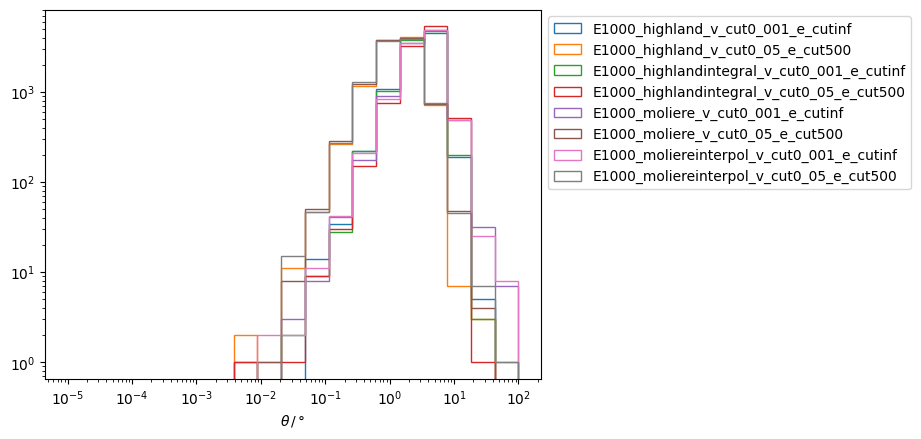

In [6]:
bins = np.logspace(-5, 2, 20)
for key in df_dict.keys():
    plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)
    median = np.median(np.rad2deg(df_dict[key].deflection))
    upper_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.99)
    lower_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.01)
    df_dict[key]['median'] = median 
    df_dict[key]['upper_95'] = upper_95 
    df_dict[key]['lower_95'] = lower_95 

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend(bbox_to_anchor=(1,1))

# Multiple scattering only

In [7]:
file_path = 'data/deflection_method_shower_dist/MS_only.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()

df_dict_MS = {}
for key in keys:
    print(key)
    df_dict_MS[key] = pd.read_hdf(file_path, key=key)

E1000_highland_v_cut0_001_e_cutinf_MS_only
E1000_highland_v_cut0_05_e_cut500_MS_only
E1000_highlandintegral_v_cut0_001_e_cutinf_MS_only
E1000_highlandintegral_v_cut0_05_e_cut500_MS_only
E1000_moliere_v_cut0_001_e_cutinf_MS_only
E1000_moliere_v_cut0_05_e_cut500_MS_only
E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only
E1000_moliereinterpol_v_cut0_05_e_cut500_MS_only


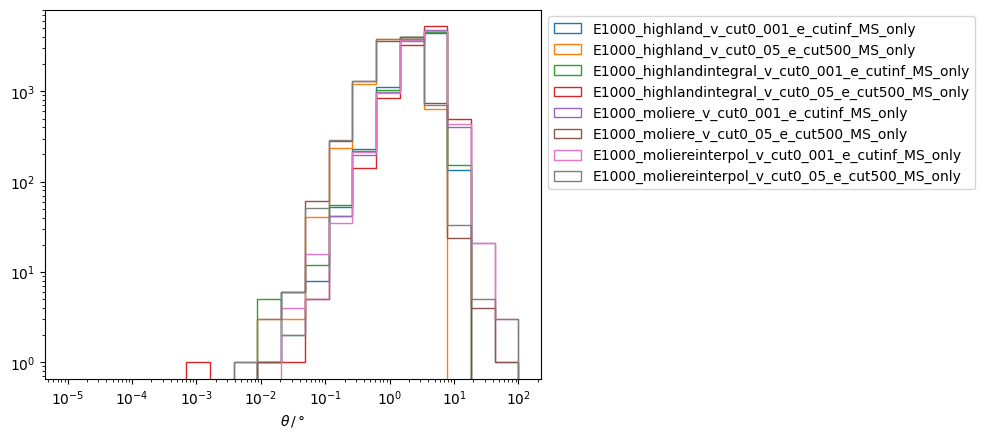

In [8]:
bins = np.logspace(-5, 2, 20)
for key in df_dict_MS.keys():
    plt.hist(np.rad2deg(df_dict_MS[key].deflection), bins=bins, histtype='step', label=key)
    median = np.median(np.rad2deg(df_dict_MS[key].deflection))
    upper_95 = np.quantile(np.rad2deg(df_dict_MS[key].deflection), 0.99)
    lower_95 = np.quantile(np.rad2deg(df_dict_MS[key].deflection), 0.01)
    df_dict_MS[key]['median'] = median 
    df_dict_MS[key]['upper_95'] = upper_95 
    df_dict_MS[key]['lower_95'] = lower_95 

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend(bbox_to_anchor=(1,1))

([<matplotlib.axis.XTick at 0x158b44150>,
 [Text(0.2, 0, 'E1000_highland_v_cut0_001_e_cutinf'),
  Text(1.2, 0, 'E1000_highland_v_cut0_05_e_cut500'),
  Text(2.2, 0, 'E1000_highlandintegral_v_cut0_001_e_cutinf'),
  Text(3.2, 0, 'E1000_highlandintegral_v_cut0_05_e_cut500'),
  Text(4.2, 0, 'E1000_moliere_v_cut0_001_e_cutinf'),
  Text(5.2, 0, 'E1000_moliere_v_cut0_05_e_cut500'),
  Text(6.2, 0, 'E1000_moliereinterpol_v_cut0_001_e_cutinf'),
  Text(7.2, 0, 'E1000_moliereinterpol_v_cut0_05_e_cut500')])

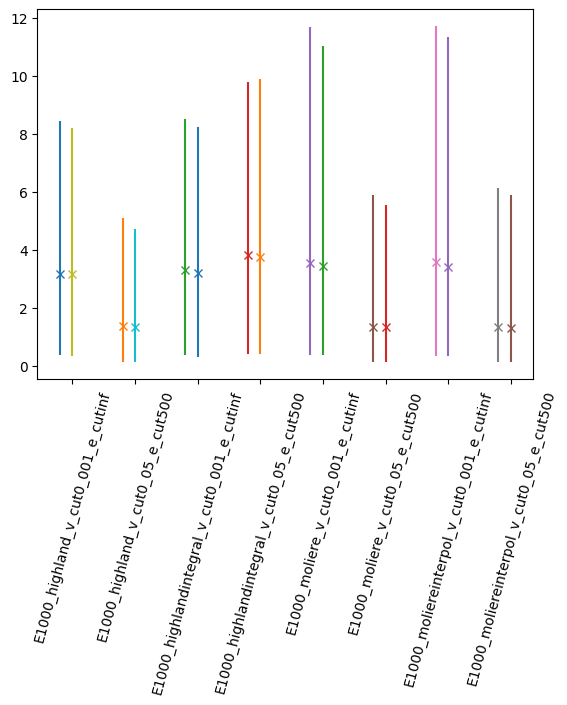

In [9]:
x = np.arange(len(df_dict.keys()))
for i, key in enumerate(df_dict.keys()):
    yerr_upper = [df_dict[key]['upper_95'].iloc[0] - df_dict[key]['median'].iloc[0]]
    yerr_lower = [df_dict[key]['median'].iloc[0] - df_dict[key]['lower_95'].iloc[0]]
    plt.errorbar(x[i], df_dict[key]['median'].iloc[0], fmt='x', yerr=[yerr_lower, yerr_upper])

x = np.arange(len(df_dict_MS.keys())) + 0.2
for i, key in enumerate(df_dict_MS.keys()):
    yerr_upper = [df_dict_MS[key]['upper_95'].iloc[0] - df_dict_MS[key]['median'].iloc[0]]
    yerr_lower = [df_dict_MS[key]['median'].iloc[0] - df_dict_MS[key]['lower_95'].iloc[0]]
    plt.errorbar(x[i], df_dict_MS[key]['median'].iloc[0], fmt='x', yerr=[yerr_lower, yerr_upper])

plt.xticks(x, [key for key in df_dict.keys()], rotation=75)

# Lateral displacement

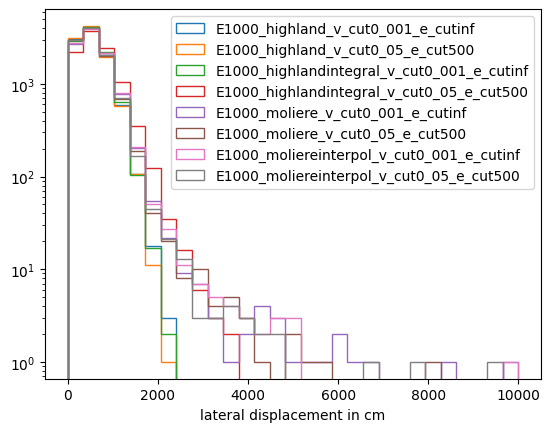

In [10]:
bins = np.linspace(0, 10000, 30)
for key in df_dict.keys():
    plt.hist(df_dict[key].lateral_disp, bins=bins, histtype='step', label=key)
    ld_median = np.median(np.rad2deg(df_dict[key].lateral_disp))
    ld_upper_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.99)
    ld_lower_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.01)
    df_dict[key]['ld_median'] = ld_median 
    df_dict[key]['ld_upper_95'] = ld_upper_95 
    df_dict[key]['ld_lower_95'] = ld_lower_95 

# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend(bbox_to_anchor=(1,1))

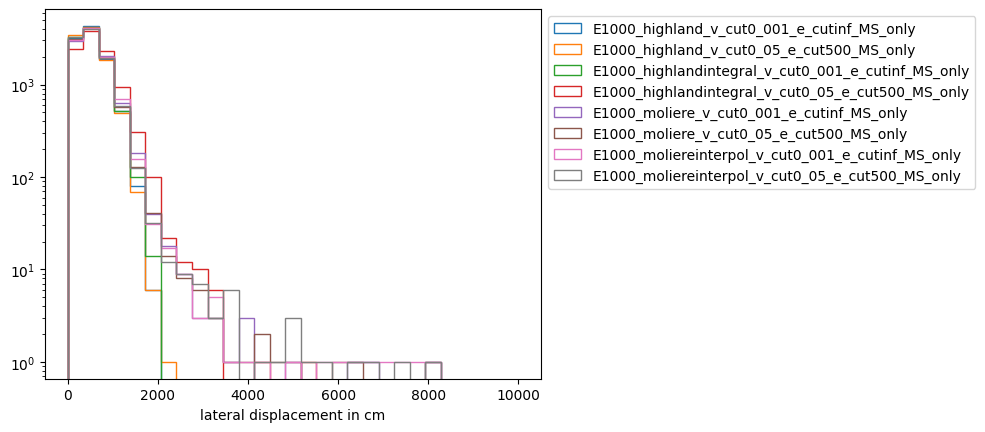

In [11]:
bins = np.linspace(0, 10000, 30)
for key in df_dict_MS.keys():
    plt.hist(df_dict_MS[key].lateral_disp, bins=bins, histtype='step', label=key)
    ld_median = np.median(np.rad2deg(df_dict_MS[key].lateral_disp))
    ld_upper_95 = np.quantile(np.rad2deg(df_dict_MS[key].lateral_disp), 0.99)
    ld_lower_95 = np.quantile(np.rad2deg(df_dict_MS[key].lateral_disp), 0.01)
    df_dict_MS[key]['ld_median'] = ld_median 
    df_dict_MS[key]['ld_upper_95'] = ld_upper_95 
    df_dict_MS[key]['ld_lower_95'] = ld_lower_95 

# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend(bbox_to_anchor=(1,1))

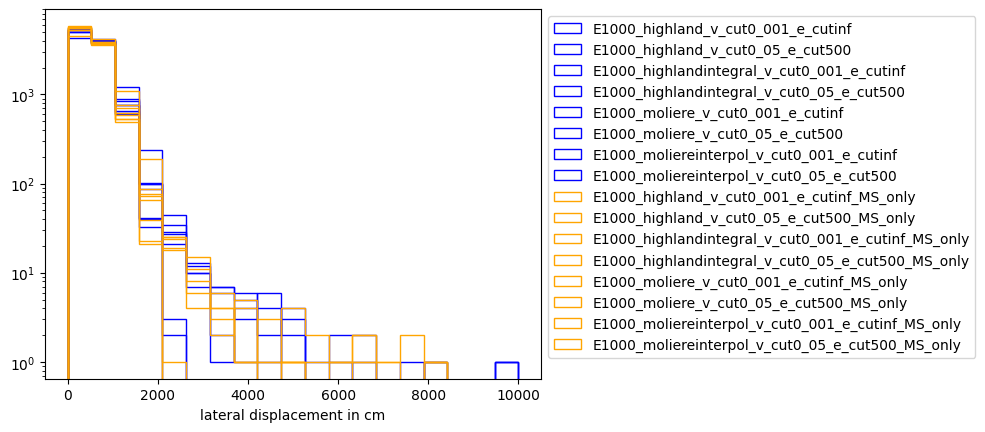

In [12]:
bins = np.linspace(0, 10000, 20)
for key in df_dict.keys():
    plt.hist(df_dict[key].lateral_disp, bins=bins, histtype='step', color='blue', label=key)
    ld_median = np.median(np.rad2deg(df_dict[key].lateral_disp))
    ld_upper_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.99)
    ld_lower_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.01)
    df_dict[key]['ld_median'] = ld_median 
    df_dict[key]['ld_upper_95'] = ld_upper_95 
    df_dict[key]['ld_lower_95'] = ld_lower_95 

bins = np.linspace(0, 10000, 20)
for key in df_dict_MS.keys():
    plt.hist(df_dict_MS[key].lateral_disp, bins=bins, histtype='step', color='orange', label=key)
    ld_median = np.median(np.rad2deg(df_dict_MS[key].lateral_disp))
    ld_upper_95 = np.quantile(np.rad2deg(df_dict_MS[key].lateral_disp), 0.99)
    ld_lower_95 = np.quantile(np.rad2deg(df_dict_MS[key].lateral_disp), 0.01)
    df_dict_MS[key]['ld_median'] = ld_median 
    df_dict_MS[key]['ld_upper_95'] = ld_upper_95 
    df_dict_MS[key]['ld_lower_95'] = ld_lower_95 



# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend(bbox_to_anchor=(1,1))

([<matplotlib.axis.XTick at 0x159195ad0>,
 [Text(0.2, 0, 'E1000_highland_v_cut0_001_e_cutinf'),
  Text(1.2, 0, 'E1000_highland_v_cut0_05_e_cut500'),
  Text(2.2, 0, 'E1000_highlandintegral_v_cut0_001_e_cutinf'),
  Text(3.2, 0, 'E1000_highlandintegral_v_cut0_05_e_cut500'),
  Text(4.2, 0, 'E1000_moliere_v_cut0_001_e_cutinf'),
  Text(5.2, 0, 'E1000_moliere_v_cut0_05_e_cut500'),
  Text(6.2, 0, 'E1000_moliereinterpol_v_cut0_001_e_cutinf'),
  Text(7.2, 0, 'E1000_moliereinterpol_v_cut0_05_e_cut500')])

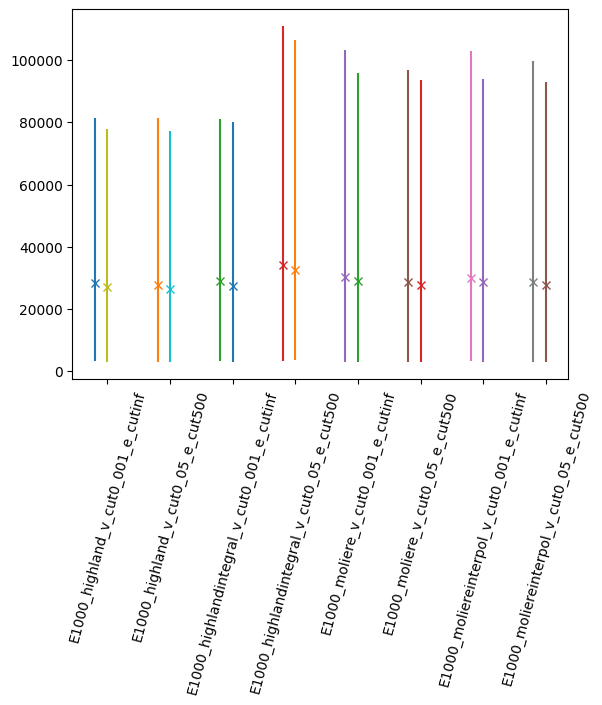

In [13]:
x = np.arange(len(df_dict.keys()))
for i, key in enumerate(df_dict.keys()):
    yerr_upper = [df_dict[key]['ld_upper_95'].iloc[0] - df_dict[key]['ld_median'].iloc[0]]
    yerr_lower = [df_dict[key]['ld_median'].iloc[0] - df_dict[key]['ld_lower_95'].iloc[0]]
    plt.errorbar(x[i], df_dict[key]['ld_median'].iloc[0], fmt='x', yerr=[yerr_lower, yerr_upper])

x = np.arange(len(df_dict_MS.keys())) + 0.2
for i, key in enumerate(df_dict_MS.keys()):
    yerr_upper = [df_dict_MS[key]['ld_upper_95'].iloc[0] - df_dict_MS[key]['ld_median'].iloc[0]]
    yerr_lower = [df_dict_MS[key]['ld_median'].iloc[0] - df_dict_MS[key]['ld_lower_95'].iloc[0]]
    plt.errorbar(x[i], df_dict_MS[key]['ld_median'].iloc[0], fmt='x', yerr=[yerr_lower, yerr_upper])

plt.xticks(x, [key for key in df_dict.keys()], rotation=75)

# Plots for PROPOSAL paper

In [57]:
file_path = 'data/deflection_method_shower_dist/paper.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()

df_dict = {}
for key in keys:
    print(key)
    df_dict[key] = pd.read_hdf(file_path, key=key)

E1000000_moliere_v_cut0_001_e_cutinf_MS_only_vG
E1000000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG
E1000000_moliereinterpol_v_cut0_001_e_cutinf_vG
E1000000_none_v_cut0_001_e_cutinf_Stoch_only_G4
E1000000_none_v_cut0_001_e_cutinf_Stoch_only_vG
E1000_highland_v_cut0_001_e_cutinf_MS_only_vG
E1000_highlandintegral_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliere_v_cut0_001_e_cutinf_G4
E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliere_v_cut0_001_e_cutinf_vG
E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliereinterpol_v_cut0_001_e_cutinf_vG
E1000_none_v_cut0_001_e_cutinf_Stoch_only_G4
E1000_none_v_cut0_001_e_cutinf_Stoch_only_vG


7.4163143384791965
2.4568797388679364
2.332204315263758
4.616361395155765
3.431268798593857
11.709184095704503
12.111810144486643
106.81397852394285
44.48281718916638
91.08900503813379
93.61848767395935
91.08723715325976
24.798544193514456
25.23678484738262


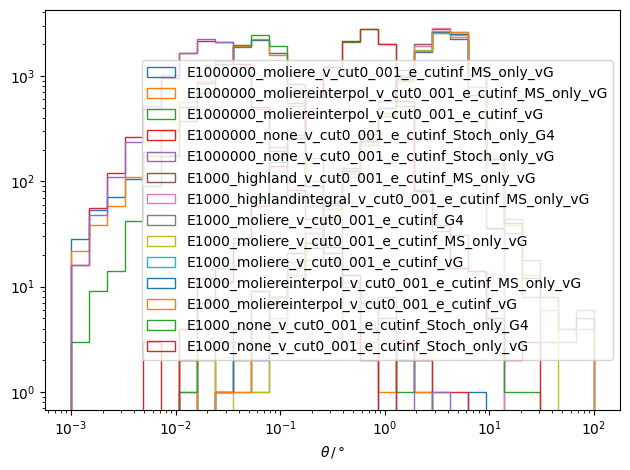

In [58]:
bins = np.logspace(-3, 2, 30)
for key in df_dict.keys():
    plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)
    median = np.median(np.rad2deg(df_dict[key].deflection))
    upper_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.99)
    lower_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.01)
    df_dict[key]['median'] = median 
    df_dict[key]['upper_95'] = upper_95 
    df_dict[key]['lower_95'] = lower_95 
    print(np.max(np.rad2deg(df_dict[key].deflection)))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_deflection.pdf')

93.61848767395935
44.48281718916638


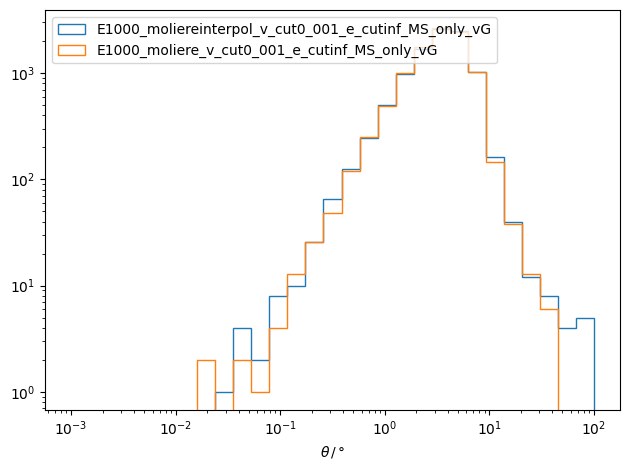

In [59]:
bins = np.logspace(-3, 2, 30)

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.99)
lower_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.01)
df_dict[key]['median'] = median 
df_dict[key]['upper_95'] = upper_95 
df_dict[key]['lower_95'] = lower_95 
print(np.max(np.rad2deg(df_dict[key].deflection)))

key = 'E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.99)
lower_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.01)
df_dict[key]['median'] = median 
df_dict[key]['upper_95'] = upper_95 
df_dict[key]['lower_95'] = lower_95 
print(np.max(np.rad2deg(df_dict[key].deflection)))


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend(loc='upper left') # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'moliere_moliereinterpol.pdf')

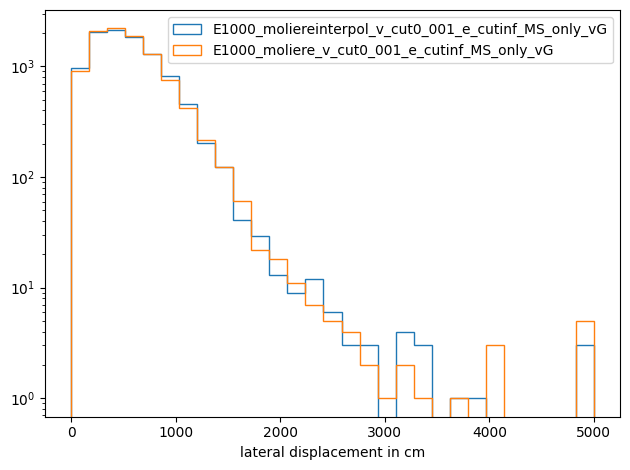

In [60]:
bins = np.linspace(0, 5000, 30)

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label=key)
ld_median = np.median(np.rad2deg(df_dict[key].lateral_disp))
ld_upper_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.99)
ld_lower_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.01)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_95'] = ld_upper_95 
df_dict[key]['ld_lower_95'] = ld_lower_95 

key = 'E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label=key)
ld_median = np.median(np.rad2deg(df_dict[key].lateral_disp))
ld_upper_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.99)
ld_lower_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.01)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_95'] = ld_upper_95 
df_dict[key]['ld_lower_95'] = ld_lower_95 


# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'moliere_moliereinterpol_lat.pdf')

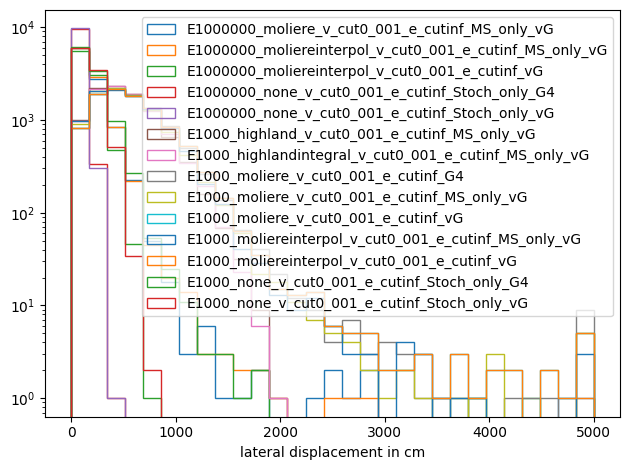

In [61]:
bins = np.linspace(0, 5000, 30)
for key in df_dict.keys():
    plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label=key)
    ld_median = np.median(np.rad2deg(df_dict[key].lateral_disp))
    ld_upper_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.99)
    ld_lower_95 = np.quantile(np.rad2deg(df_dict[key].lateral_disp), 0.01)
    df_dict[key]['ld_median'] = ld_median 
    df_dict[key]['ld_upper_95'] = ld_upper_95 
    df_dict[key]['ld_lower_95'] = ld_lower_95 

# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_lateral_disp.pdf')

max deflection:  44.48281718916638
median deflection: 3.452276812647435, upper 90%: 7.580361732949978, lower 90%: 0.877824226033985
max deflection:  93.61848767395935
median deflection: 3.4795047874206837, upper 90%: 7.820584531189999, lower 90%: 0.8677912968822379
max deflection:  25.23678484738262
median deflection: 0.6207118672229894, upper 90%: 1.379899904596362, lower 90%: 0.1724543696437932
max deflection:  91.08723715325976
median deflection: 3.5909152821639774, upper 90%: 7.893309348428029, lower 90%: 0.8986652771828899


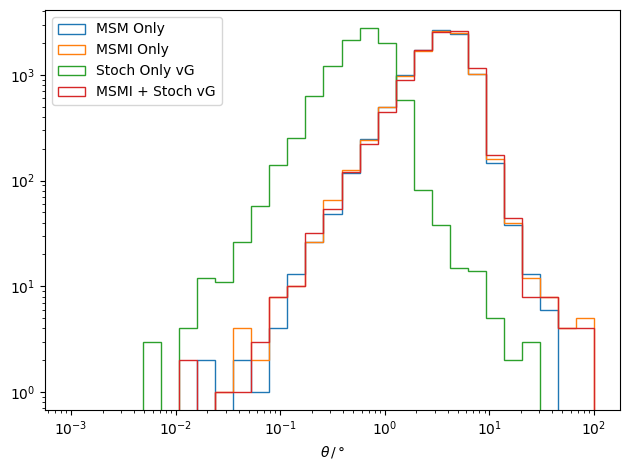

In [62]:
bins = np.logspace(-3, 2, 30)

key = 'E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label='MSM Only')
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.95)
lower_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.05)
df_dict[key]['median'] = median 
df_dict[key]['upper_90'] = upper_90 
df_dict[key]['lower_90'] = lower_90 
print('max deflection: ', np.max(np.rad2deg(df_dict[key].deflection)))
print(f'median deflection: {median}, upper 90%: {upper_90}, lower 90%: {lower_90}')

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label='MSMI Only')
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.95)
lower_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.05)
df_dict[key]['median'] = median 
df_dict[key]['upper_90'] = upper_90 
df_dict[key]['lower_90'] = lower_90 
print('max deflection: ', np.max(np.rad2deg(df_dict[key].deflection)))
print(f'median deflection: {median}, upper 90%: {upper_90}, lower 90%: {lower_90}')

key = 'E1000_none_v_cut0_001_e_cutinf_Stoch_only_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label='Stoch Only vG')
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.95)
lower_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.05)
df_dict[key]['median'] = median 
df_dict[key]['upper_90'] = upper_90 
df_dict[key]['lower_90'] = lower_90 
print('max deflection: ', np.max(np.rad2deg(df_dict[key].deflection)))
print(f'median deflection: {median}, upper 90%: {upper_90}, lower 90%: {lower_90}')

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_vG'
plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label='MSMI + Stoch vG')
median = np.median(np.rad2deg(df_dict[key].deflection))
upper_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.95)
lower_90 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.05)
df_dict[key]['median'] = median 
df_dict[key]['upper_90'] = upper_90 
df_dict[key]['lower_90'] = lower_90 
print('max deflection: ', np.max(np.rad2deg(df_dict[key].deflection)))
print(f'median deflection: {median}, upper 90%: {upper_90}, lower 90%: {lower_90}')


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_deflection_4_params.pdf')

max disp:  14873.723451925194
median disp: 503.52540346434176, upper 90%: 1195.6373748658168, lower 90%: 122.90738145094429
max disp:  6780.466765057242
median disp: 505.4858537164282, upper 90%: 1184.8098340983154, lower 90%: 120.66262284522492
max disp:  794.6127766032497
median disp: 147.75542238168345, upper 90%: 352.056571456745, lower 90%: 37.39742082062179
max disp:  20787.361897812087
median disp: 524.7116016010864, upper 90%: 1253.6513760403827, lower 90%: 131.32460490099638


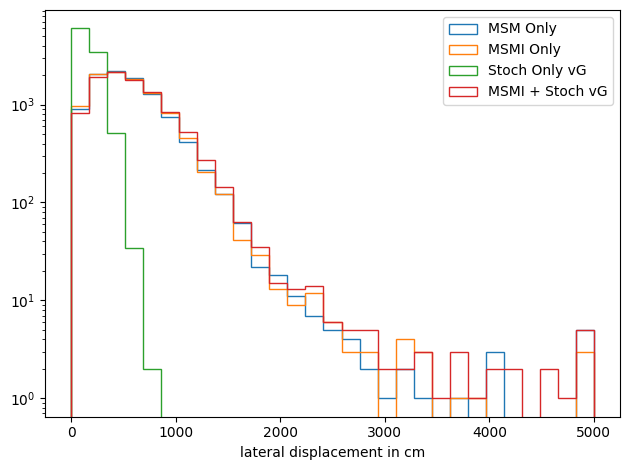

In [63]:
bins = np.linspace(0, 5000, 30)

key = 'E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label='MSM Only')
ld_median = np.median(df_dict[key].lateral_disp)
ld_upper_90 = np.quantile(df_dict[key].lateral_disp, 0.95)
ld_lower_90 = np.quantile(df_dict[key].lateral_disp, 0.05)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_90'] = ld_upper_90 
df_dict[key]['ld_lower_90'] = ld_lower_90 
print('max disp: ', np.max(df_dict[key].lateral_disp))
print(f'median disp: {ld_median}, upper 90%: {ld_upper_90}, lower 90%: {ld_lower_90}')

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label='MSMI Only')
ld_median = np.median(df_dict[key].lateral_disp)
ld_upper_90 = np.quantile(df_dict[key].lateral_disp, 0.95)
ld_lower_90 = np.quantile(df_dict[key].lateral_disp, 0.05)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_90'] = ld_upper_90 
df_dict[key]['ld_lower_90'] = ld_lower_90 
print('max disp: ', np.max(df_dict[key].lateral_disp))
print(f'median disp: {ld_median}, upper 90%: {ld_upper_90}, lower 90%: {ld_lower_90}')

key = 'E1000_none_v_cut0_001_e_cutinf_Stoch_only_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label='Stoch Only vG')
ld_median = np.median(df_dict[key].lateral_disp)
ld_upper_90 = np.quantile(df_dict[key].lateral_disp, 0.95)
ld_lower_90 = np.quantile(df_dict[key].lateral_disp, 0.05)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_90'] = ld_upper_90 
df_dict[key]['ld_lower_90'] = ld_lower_90 
print('max disp: ', np.max(df_dict[key].lateral_disp))
print(f'median disp: {ld_median}, upper 90%: {ld_upper_90}, lower 90%: {ld_lower_90}')

key = 'E1000_moliereinterpol_v_cut0_001_e_cutinf_vG'
plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label='MSMI + Stoch vG')
ld_median = np.median(df_dict[key].lateral_disp)
ld_upper_90 = np.quantile(df_dict[key].lateral_disp, 0.95)
ld_lower_90 = np.quantile(df_dict[key].lateral_disp, 0.05)
df_dict[key]['ld_median'] = ld_median 
df_dict[key]['ld_upper_90'] = ld_upper_90 
df_dict[key]['ld_lower_90'] = ld_lower_90 
print('max disp: ', np.max(df_dict[key].lateral_disp))
print(f'median disp: {ld_median}, upper 90%: {ld_upper_90}, lower 90%: {ld_lower_90}')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_lateral_disp_4_params.pdf')

# Check 1PeV to 1TeV

In [47]:
file_path = 'data/deflection_method_shower_dist/paper.hdf5'
f = h5py.File(file_path)
keys = [key for key in f.keys()]
f.close()

df_dict = {}
for key in keys:
    print(key)
    df_dict[key] = pd.read_hdf(file_path, key=key)

E1000000_moliere_v_cut0_001_e_cutinf_MS_only_vG
E1000000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG
E1000000_moliereinterpol_v_cut0_001_e_cutinf_vG
E1000000_none_v_cut0_001_e_cutinf_Stoch_only_G4
E1000000_none_v_cut0_001_e_cutinf_Stoch_only_vG
E1000_highland_v_cut0_001_e_cutinf_MS_only_vG
E1000_highlandintegral_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliere_v_cut0_001_e_cutinf_G4
E1000_moliere_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliere_v_cut0_001_e_cutinf_vG
E1000_moliereinterpol_v_cut0_001_e_cutinf_MS_only_vG
E1000_moliereinterpol_v_cut0_001_e_cutinf_vG
E1000_none_v_cut0_001_e_cutinf_Stoch_only_G4
E1000_none_v_cut0_001_e_cutinf_Stoch_only_vG


7.4163143384791965
2.4568797388679364
2.332204315263758
4.616361395155765
3.431268798593857


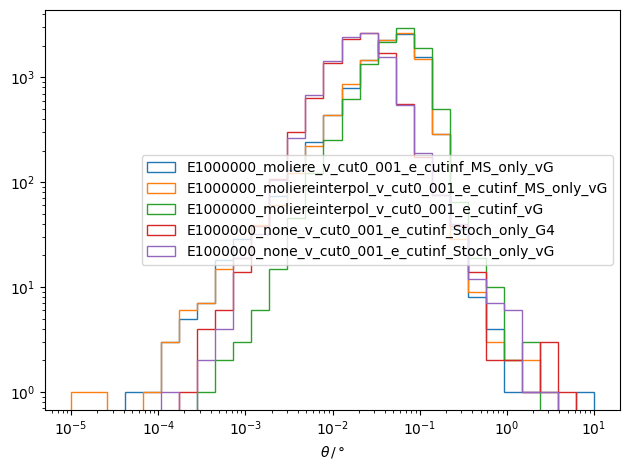

In [52]:
bins = np.logspace(-5, 1, 30)
for key in keys[:5]:
    plt.hist(np.rad2deg(df_dict[key].deflection), bins=bins, histtype='step', label=key)
    median = np.median(np.rad2deg(df_dict[key].deflection))
    upper_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.99)
    lower_95 = np.quantile(np.rad2deg(df_dict[key].deflection), 0.01)
    df_dict[key]['median'] = median 
    df_dict[key]['upper_95'] = upper_95 
    df_dict[key]['lower_95'] = lower_95 
    print(np.max(np.rad2deg(df_dict[key].deflection)))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,°$')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_deflection.pdf')

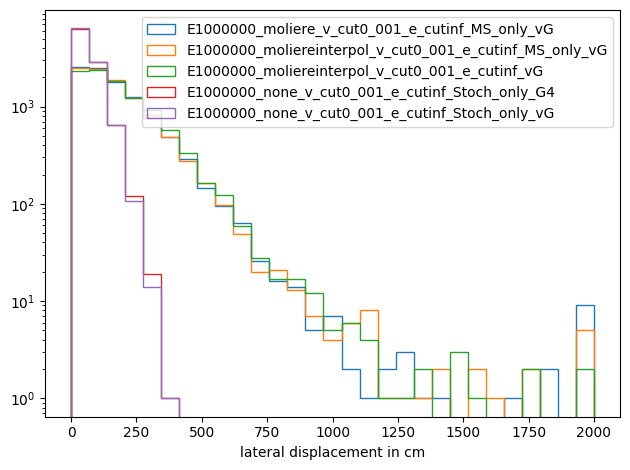

In [54]:
bins = np.linspace(0, 2000, 30)
for key in keys[:5]:
    plt.hist(np.clip(df_dict[key].lateral_disp, bins[0], bins[-1]), bins=bins, histtype='step', label=key)
    ld_median = np.median(df_dict[key].lateral_disp)
    ld_upper_95 = np.quantile(df_dict[key].lateral_disp, 0.99)
    ld_lower_95 = np.quantile(df_dict[key].lateral_disp, 0.01)
    df_dict[key]['ld_median'] = ld_median 
    df_dict[key]['ld_upper_95'] = ld_upper_95 
    df_dict[key]['ld_lower_95'] = ld_lower_95 

# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'lateral displacement in cm')
plt.legend() # bbox_to_anchor=(1,1))
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_lateral_disp.pdf')